In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import RZGate, RZZGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5
beta  = 0.1
n_qubits = 8

trotter_steps = 10
T = 0.25

qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits, name='cr')
qc = QuantumCircuit(qr, cr)

for i in range(n_qubits):
    qc.h(i)

for step in range(trotter_steps):

    alpha = -2 * gamma * (T / trotter_steps)
    
    qc.rz(alpha * -2.0, 2)
    qc.rz(alpha -1.0, 3)
    qc.rzz(alpha * 2.0, 2, 3)
    
    qc.rz(alpha * -6.0, 4)
    qc.rz(alpha * -3.0, 5)
    qc.rzz(alpha * 2.0, 4, 5)
    
    qc.rz(alpha * -6.0, 0)
    qc.rz(alpha * -3.0, 1)
    qc.rzz(alpha * 2.0, 0, 1)
    
    qc.rz(-6.0, 6)
    qc.rz(-3.0, 7)
    qc.rzz(alpha * 2.0, 6, 7)
    
    for i in range(n_qubits):
        qc.rx(2 * beta, i)

qc.measure(range(n_qubits), range(n_qubits))

# Draw the circuit
#qc.draw(output='mpl', style='iqp')


In [4]:
simulator = BasicSimulator()

# Simulate the circuit
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# # Print the counts
# print(result.get_counts())

# # Plot the histogram
# plot_histogram(result.get_counts())

# Sort the outcomes by frequency (highest first) and take the top 5.
top5 = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 solutions.
print("Top 5 solutions:")
for bitstr, cnt in top5:
    print(f"{bitstr}: {cnt}")


Top 5 solutions:
01011101: 21
10010101: 18
10011101: 18
01010001: 17
01010101: 17


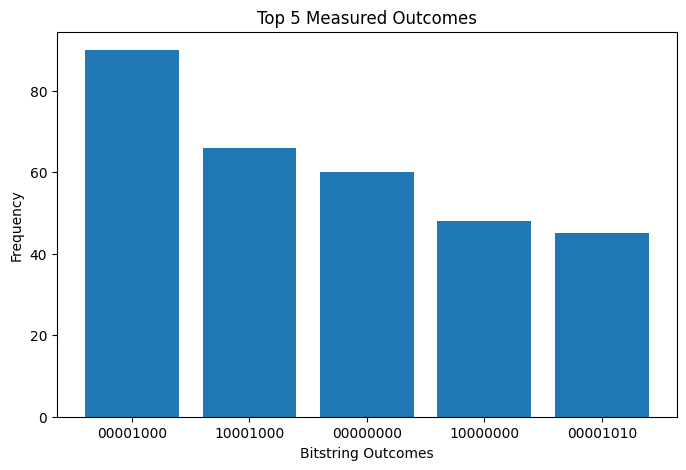

In [8]:
# Extracting bitstrings and their counts
bitstrings, frequencies = zip(*top5)

# Plot the histogram for the top 5 solutions
plt.figure(figsize=(8, 5))
plt.bar(bitstrings, frequencies)
plt.xlabel("Bitstring Outcomes")
plt.ylabel("Frequency")
plt.title("Top 5 Measured Outcomes")
plt.show()

Top 5 solutions:
00001000: 96
10001000: 69
00000000: 50
00001010: 42
10001010: 41


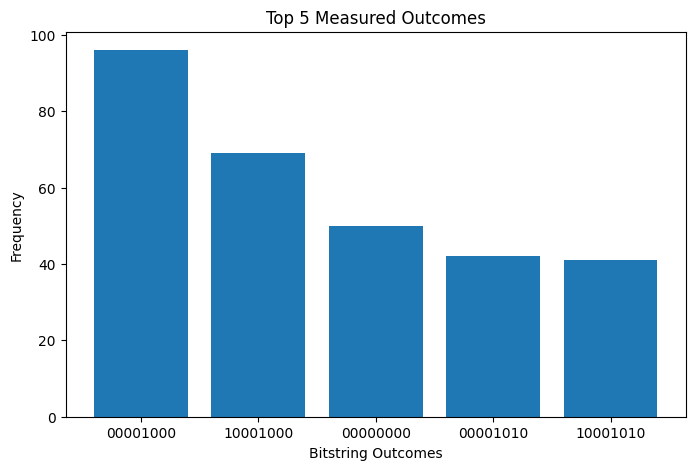

In [66]:
# Use the following code instead if you want to run on a simulator:
from qiskit_ibm_runtime.fake_provider import FakeKyiv
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService

backend = FakeKyiv()

# Define Sampler
sampler = Sampler(mode=backend)

compiled_circuit = transpile(qc, backend)

# Run calculation
job = sampler.run([compiled_circuit], shots=1024)
 
result = job.result()

counts = result[0].data.cr.get_counts()

# Sort the outcomes by frequency (highest first) and take the top 5.
top5 = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 solutions.
print("Top 5 solutions:")
for bitstr, cnt in top5:
    print(f"{bitstr}: {cnt}")

# Extracting bitstrings and their counts
bitstrings, frequencies = zip(*top5)

# Plot the histogram for the top 5 solutions
plt.figure(figsize=(8, 5))
plt.bar(bitstrings, frequencies)
plt.xlabel("Bitstring Outcomes")
plt.ylabel("Frequency")
plt.title("Top 5 Measured Outcomes")
plt.show()

Top 5 solutions:
00001000: 93
10001000: 76
00101000: 47
00001010: 46
00000000: 43


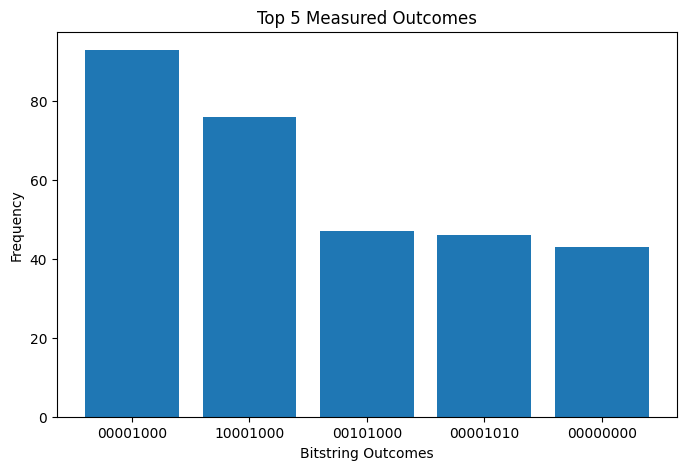

In [69]:
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
 
api_token = '...'
# If you did not previously save your credentials, use the following line instead:
service = QiskitRuntimeService(channel="ibm_quantum", token=api_token)
 
# Get a backend
backend = service.least_busy(operational=True, simulator=False)
 
# Define Sampler
sampler = Sampler(mode=backend)

compiled_circuit = transpile(qc, backend)

# Run calculation
job = sampler.run([compiled_circuit], shots=1024)
 
result = job.result()

counts = result[0].data.cr.get_counts()

# Sort the outcomes by frequency (highest first) and take the top 5.
top5 = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 solutions.
print("Top 5 solutions:")
for bitstr, cnt in top5:
    print(f"{bitstr}: {cnt}")

# Extracting bitstrings and their counts
bitstrings, frequencies = zip(*top5)

# Plot the histogram for the top 5 solutions
plt.figure(figsize=(8, 5))
plt.bar(bitstrings, frequencies)
plt.xlabel("Bitstring Outcomes")
plt.ylabel("Frequency")
plt.title("Top 5 Measured Outcomes")
plt.show()